# Построение АвтоМЛ моделей на данных соревнования https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

In [67]:
#импорт начальных библиотек
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
#assert python version >=3,5
import sys
assert sys.version_info >= (3,5)

import warnings

%matplotlib inline
display(HTML("<style>.container { width:80% !important; }</style>"))

warnings.filterwarnings("ignore")

In [2]:
#загрузка данных и знакомство с ними
labels_data_file_path = './data/train_labels.csv'
features_data_file_path = './data/train_values.csv'
df_labels = pd.read_csv(labels_data_file_path)


In [3]:
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
df_labels.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [5]:
df_features = pd.read_csv(features_data_file_path)

In [6]:
df_features.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#объединение данных
df = pd.merge(df_features, df_labels, on='building_id', how='inner')
df.drop(['building_id'], axis=1, inplace=True)
target = 'damage_grade'

In [8]:
#normalize the target
df[target] = df[target] - 1

In [9]:
#сплитимся
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df[target], shuffle=True, random_state=143)

In [10]:
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,1
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,1
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,2


* <span style="color: orange">geo_level_1_id, geo_level_2_id, geo_level_3_id</span> (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* <span style="color: orange">count_floors_pre_eq</span> (type: int): number of floors in the building before the earthquake.
* <span style="color: orange">age</span> (type: int): age of the building in years.
* <span style="color: orange">area_percentage</span> (type: int): normalized area of the building footprint.
* <span style="color: orange">height_percentage</span> (type: int): normalized height of the building footprint.
* <span style="color: orange">land_surface_condition</span> (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
* <span style="color: orange">foundation_type</span> (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
* <span style="color: orange">roof_type (type: categorical)</span>: type of roof used while building. Possible values: n, q, x.
* <span style="color: orange">ground_floor_type</span> (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
* <span style="color: orange">other_floor_type</span> (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* <span style="color: orange">position</span> (type: categorical): position of the building. Possible values: j, o, s, t.
* <span style="color: orange">plan_configuration</span> (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* <span style="color: orange">has_superstructure_adobe_mud</span> (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
* <span style="color: orange">has_superstructure_mud_mortar_stone</span> (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* <span style="color: orange">has_superstructure_stone_flag</span> (type: binary): flag variable that indicates if the superstructure was made of Stone.
* <span style="color: orange">has_superstructure_cement_mortar_stone</span> (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
* <span style="color: orange">has_superstructure_mud_mortar_brick</span> (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* <span style="color: orange">has_superstructure_cement_mortar_brick</span> (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* <span style="color: orange">has_superstructure_timber (type: binary)</span>: flag variable that indicates if the superstructure was made of Timber.
* <span style="color: orange">has_superstructure_bamboo (type: binary)</span>: flag variable that indicates if the superstructure was made of Bamboo.
* <span style="color: orange">has_superstructure_rc_non_engineered</span> (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
* <span style="color: orange">has_superstructure_rc_engineered</span> (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* <span style="color: orange">has_superstructure_other</span> (type: binary): flag variable that indicates if the superstructure was made of any other material.
* <span style="color: orange">legal_ownership_status</span> (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
* <span style="color: orange">count_families</span> (type: int): number of families that live in the building.
* <span style="color: orange">has_secondary_use</span> (type: binary): flag variable that indicates if the building was used for any secondary purpose.
* <span style="color: orange">has_secondary_use_agriculture</span> (type: binary): flag variable that indicates if the building was used for agricultural purposes.
* <span style="color: orange">has_secondary_use_hotel</span> (type: binary): flag variable that indicates if the building was used as a hotel.
* <span style="color: orange">has_secondary_use_rental</span> (type: binary): flag variable that indicates if the building was used for rental purposes.
* <span style="color: orange">has_secondary_use_institution</span> (type: binary): flag variable that indicates if the building was used as a location of any institution.
* <span style="color: orange">has_secondary_use_school</span> (type: binary): flag variable that indicates if the building was used as a school.
* <span style="color: orange">has_secondary_use_industry</span> (type: binary): flag variable that indicates if the building was used for industrial purposes.
* <span style="color: orange">has_secondary_use_health_post</span> (type: binary): flag variable that indicates if the building was used as a health post.
* <span style="color: orange">has_secondary_use_gov_office</span> (type: binary): flag variable that indicates if the building was used fas a government office.
* <span style="color: orange">has_secondary_use_use_police</span> (type: binary): flag variable that indicates if the building was used as a police station.
* <span style="color: orange">has_secondary_use_other</span> (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

## Часть 1. Используем АвтоМЛ.

### Попробуем AutoGluon

In [11]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [12]:
train_data = TabularDataset(df_train)

In [13]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
118591,17,1322,6256,3,20,10,7,t,r,n,...,0,0,0,0,0,0,0,0,0,1
118933,20,158,621,2,10,2,2,t,r,n,...,0,0,0,0,0,0,0,0,0,1
222973,26,1110,2549,2,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
63427,25,902,5352,1,5,7,3,t,r,q,...,0,0,0,0,0,0,0,0,0,2
189419,3,574,3815,2,15,8,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2


In [14]:
time_limit_sec = 60 
ag_predictor = TabularPredictor(label=target, path='models/autogluon').fit(train_data, time_limit = time_limit_sec)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "models/autogluon/"
AutoGluon Version:  0.5.2
Python Version:     3.8.10
Operating System:   Linux
Train Data Rows:    208480
Train Data Columns: 38
Label Column: damage_grade
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 0, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    24142.22 MB
	Train Data (Original)  Memory Usage: 146.77 MB (0.6% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually spec

In [15]:
test_data = TabularDataset(df_test)

In [16]:
#see the temporary results
ag_predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.736517,0.7476,0.633242,0.076527,58.433484,0.011967,0.000267,0.108836,2,True,5
1,RandomForestGini,0.725754,0.7252,0.235683,0.018565,5.415607,0.235683,0.018565,5.415607,1,True,4
2,KNeighborsUnif,0.701848,0.7048,0.082262,0.026902,0.259726,0.082262,0.026902,0.259726,1,True,1
3,KNeighborsDist,0.691737,0.6920,0.081863,0.013593,0.259205,0.081863,0.013593,0.259205,1,True,2
4,NeuralNetFastAI,0.686748,0.6980,0.221467,0.017200,52.390110,0.221467,0.017200,52.390110,1,True,3


In [19]:
#temporary results look good, so make some tuning of fit
from sklearn.metrics import f1_score
from autogluon.core.metrics import make_scorer
f1 = make_scorer(score_func=f1_score, optimum=1, greater_is_better=True,  name="f1_micro",  metric_kwargs={"average":"micro"})

time_limit_sec = 3600 #1hour
ag_predictor = TabularPredictor(target, eval_metric=f1).fit(train_data, time_limit=time_limit_sec, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20221014_072203/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels/ag-20221014_072203/"
AutoGluon Version:  0.5.2
Python Version:     3.8.10
Operating System:   Linux
Train Data Rows:    208480
Train Data Columns: 38
Label Column: damage_grade
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 0, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator

In [20]:
ag_predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost_BAG_L2,0.749161,0.747822,17.888965,62.165442,2972.567751,0.281613,0.372513,619.521025,2,True,18
1,LightGBMXT_BAG_L2,0.748834,0.748499,18.160462,63.327871,2373.264029,0.553109,1.534942,20.217303,2,True,14
2,LightGBM_BAG_L2,0.748777,0.748273,17.995116,62.775752,2368.421302,0.387764,0.982823,15.374576,2,True,15
3,NeuralNetTorch_BAG_L2,0.748719,0.748201,21.829121,64.972513,2425.644122,4.221769,3.179584,72.597396,2,True,22
4,NeuralNetFastAI_BAG_L2,0.748604,0.748460,20.932909,63.932649,2630.554596,3.325557,2.139720,277.507870,2,True,13
5,XGBoost_BAG_L2,0.748547,0.748187,18.893449,63.011129,2371.453884,1.286096,1.218200,18.407158,2,True,21
6,RandomForestEntr_BAG_L2,0.748432,0.750638,18.430135,67.460890,2383.965394,0.822782,5.667961,30.918668,2,True,17
7,WeightedEnsemble_L3,0.748259,0.752077,24.307225,85.974907,3377.751515,0.003948,0.032746,38.012162,3,True,24
8,LightGBMLarge_BAG_L2,0.748086,0.747472,18.043549,63.214631,2368.370954,0.436197,1.421702,15.324228,2,True,23
9,ExtraTreesGini_BAG_L2,0.747760,0.751132,18.347639,66.940156,2369.403544,0.740286,5.147228,16.356818,2,True,19


In [21]:
#print the best score
f1_score(df_test[target], ag_predictor.predict(df_test), average="micro")

0.7482588591930316

### Теперь попробуем LightAutoML от Сбера

In [22]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [23]:
time_limit_sec = 3600 #1hour
lm_automl = TabularAutoML(
    task = Task(
        name = 'multiclass',
        metric = lambda y_true, y_pred: f1_score(y_true, np.argmax(y_pred, axis=1) , average="micro")
    ),
    timeout=time_limit_sec
)

In [24]:
lm_predictor = lm_automl.fit_predict(
    df_train,
    roles = {'target': target}
)

Stdout logging level is ERROR.
Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
Task: multiclass

Start automl preset with listed constraints:
- time: 3600.00 seconds
- CPU: 4 cores
- memory: 16 GB

Train data shape: (208480, 39)

Feats was rejected during automatic roles guess: []
Layer 1 train process start. Time left 3596.93 secs
Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [64, 65, 66, 67, 68, 69, 70, 71, 72], 'embed_sizes': array([20,  4,  4, 32,  5,  5,  5,  6,  8], dtype=int32), 'data_size': 73}
===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
Linear model: C = 1e-05 score = 0.7160399079048348
Linear model: C = 5e-05 score = 0.7252494244052188
Linear model: C = 0.0001 score = 0.7258490023023

In [25]:
preds = lm_automl.predict(df_test)

In [27]:
#check f1 score 
f1_score(df_test[target].values, np.argmax(preds.data, axis=1), average="micro")

0.11053126379002705

## Попробуем провести дата-анализ и собрать модели сами

In [31]:
#пропусков в данных нет
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [32]:
#проверим уникальность
df.nunique() 

geo_level_1_id                               31
geo_level_2_id                             1414
geo_level_3_id                            11595
count_floors_pre_eq                           9
age                                          42
area_percentage                              84
height_percentage                            27
land_surface_condition                        3
foundation_type                               5
roof_type                                     3
ground_floor_type                             5
other_floor_type                              4
position                                      4
plan_configuration                           10
has_superstructure_adobe_mud                  2
has_superstructure_mud_mortar_stone           2
has_superstructure_stone_flag                 2
has_superstructure_cement_mortar_stone        2
has_superstructure_mud_mortar_brick           2
has_superstructure_cement_mortar_brick        2
has_superstructure_timber               

In [33]:
#числовые переменные
num_cols = ['count_floors_pre_eq','age','area_percentage','height_percentage','count_families']


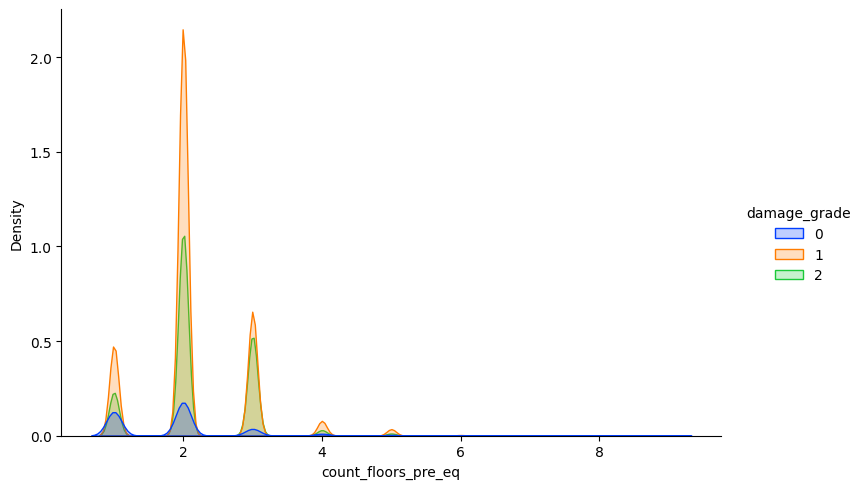

In [34]:
#проверим распределение фичи count_floors_pre_eq
sns.displot(data=df, x='count_floors_pre_eq', hue='damage_grade', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

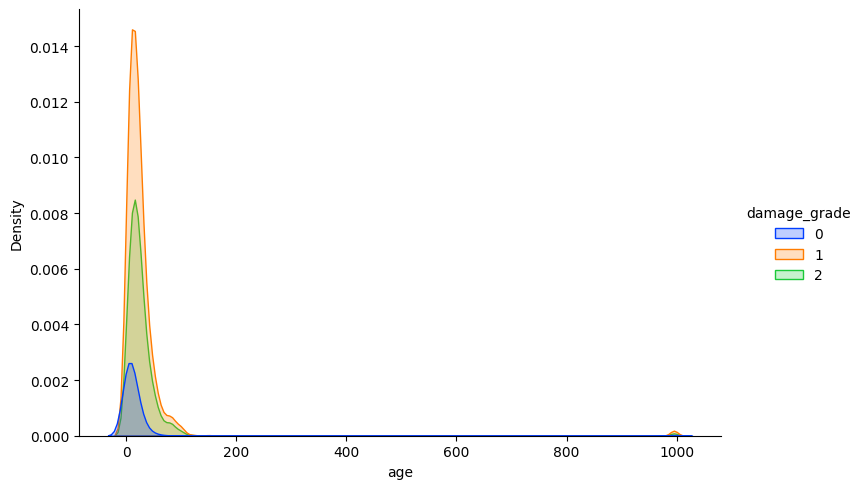

In [35]:
#проверим распределение фичи age
sns.displot(data=df, x='age', hue='damage_grade', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

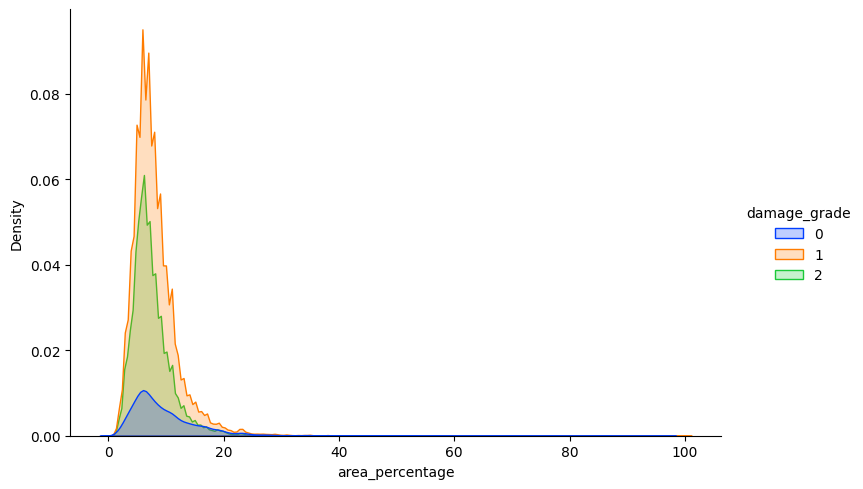

In [36]:
#проверим распределение фичи area_percentage
sns.displot(data=df, x='area_percentage', hue='damage_grade', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

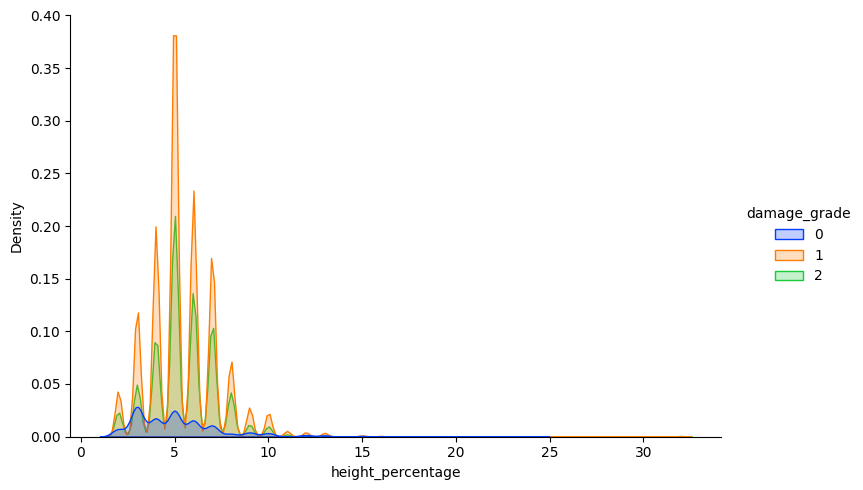

In [37]:
#проверим распределение фичи height_percentage
sns.displot(data=df, x='height_percentage', hue=target, kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

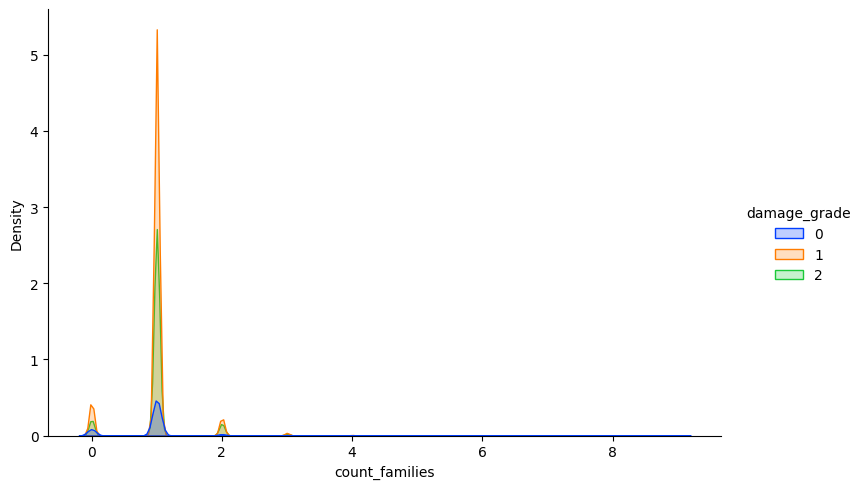

In [38]:
#проверим распределение фичи count_families
sns.displot(data=df, x='count_families', hue=target, kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

In [39]:
hash_cols = ['geo_level_1_id','geo_level_2_id','geo_level_3_id']

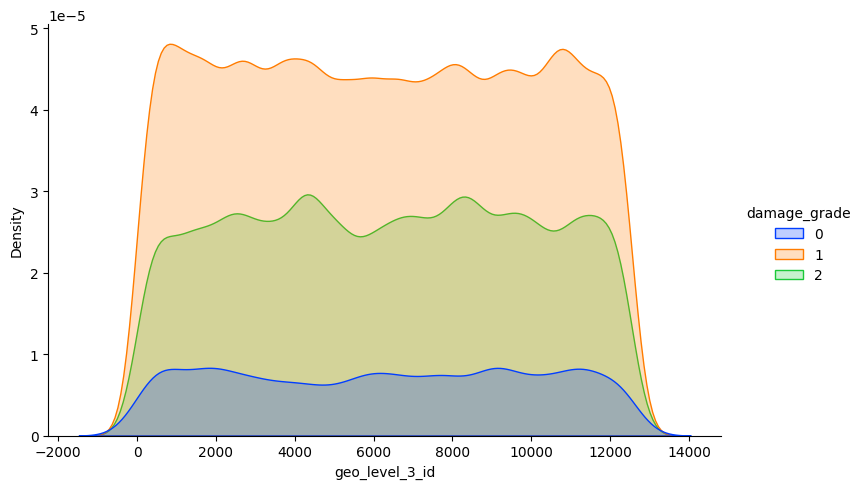

In [40]:
#проверим распределение фичи geo_level_3_id
sns.displot(data=df, x='geo_level_3_id', hue=target, kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

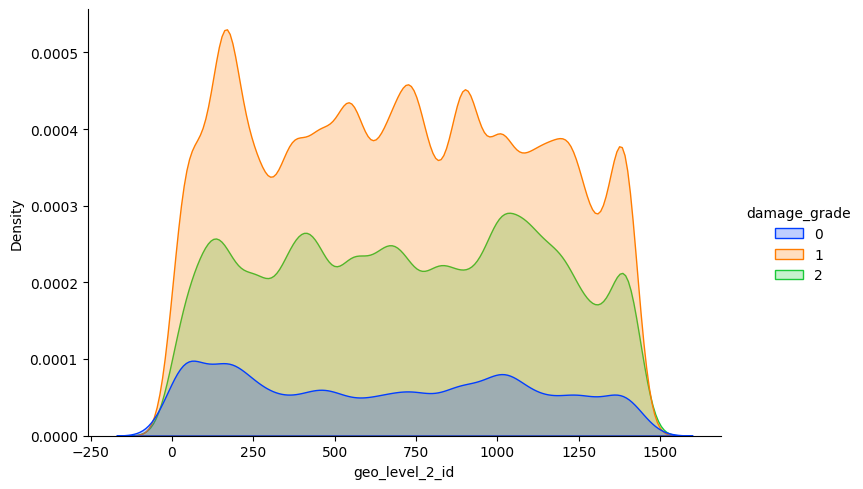

In [41]:
#проверим распределение фичи geo_level_2_id
sns.displot(data=df, x='geo_level_2_id', hue=target, kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

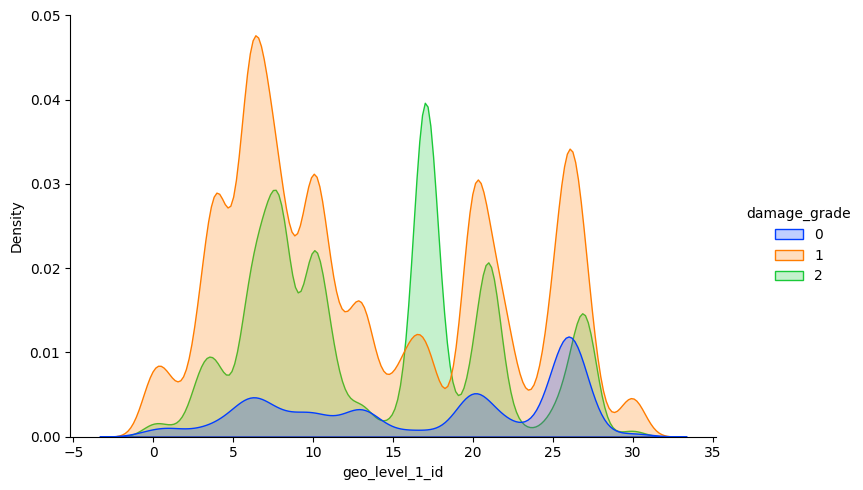

In [42]:
#проверим распределение фичи geo_level_1_id
sns.displot(data=df, x='geo_level_1_id', hue=target, kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

In [43]:
#cat переменные
cat_cols = ['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other','legal_ownership_status','has_secondary_use','has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']


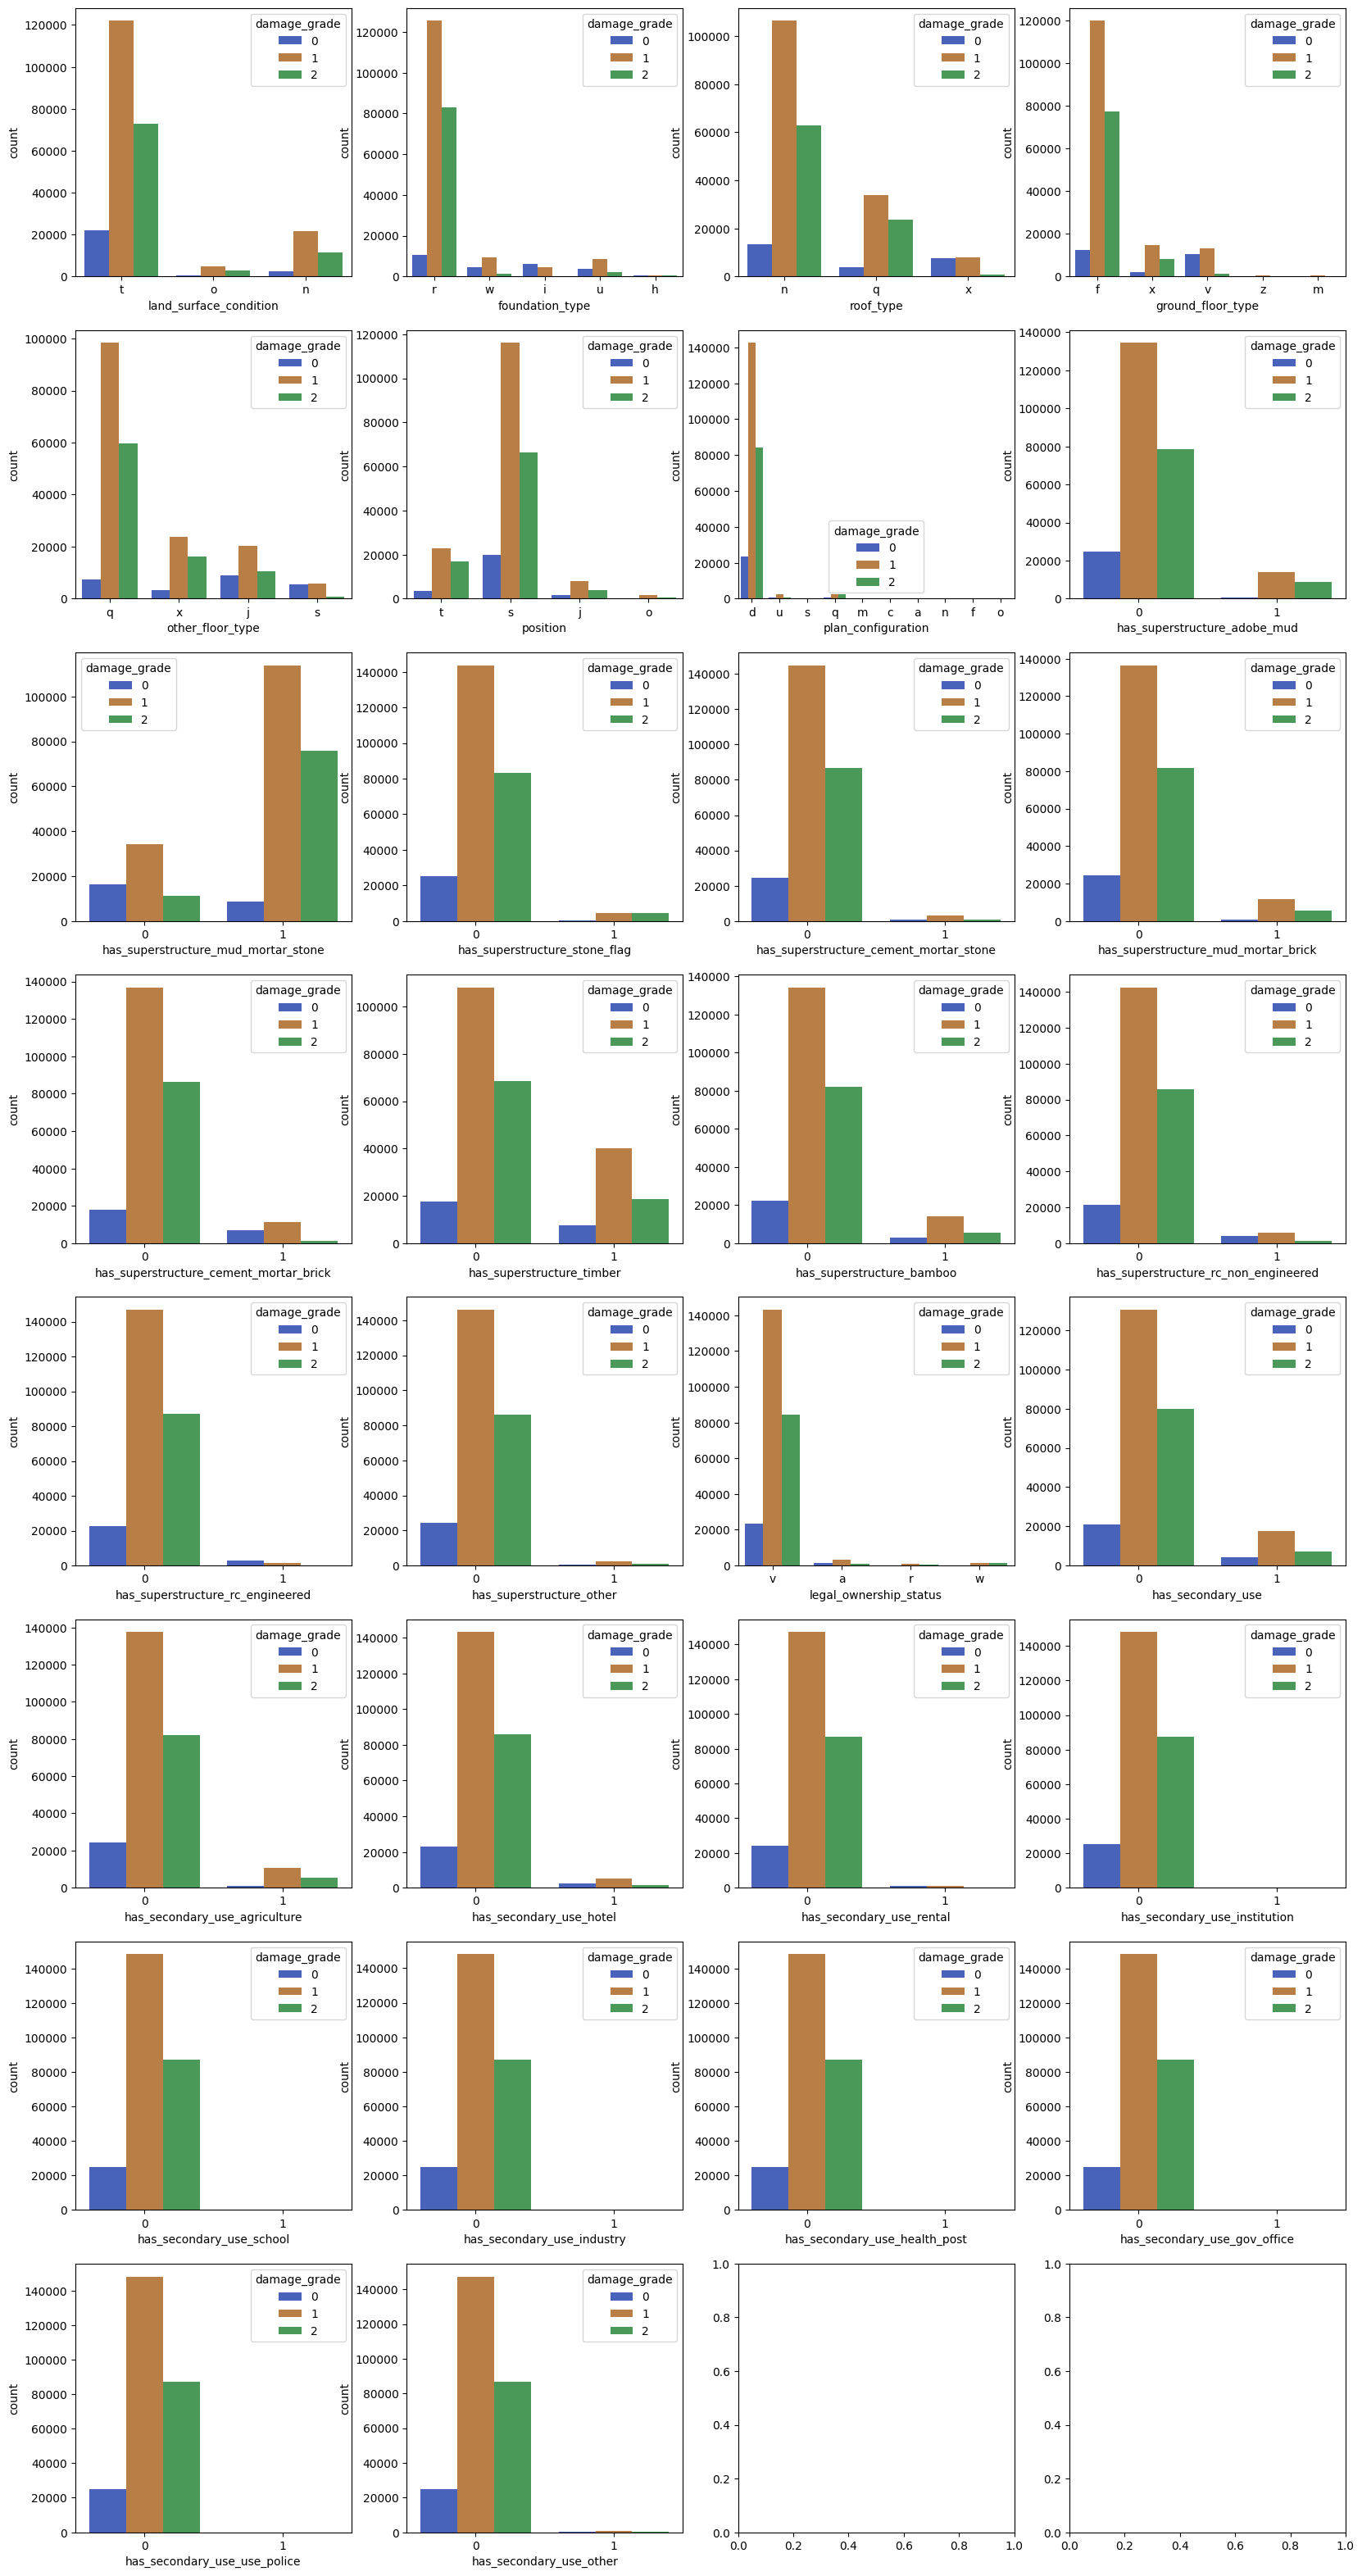

In [44]:
fig, axes = plt.subplots(len(cat_cols) // 4 + 1, 4, figsize=(20,40))
for i in range(len(cat_cols)):
    ax = axes[i // 4, i % 4]
    #ax.set_title(cat_cols[i])
    sns.countplot(ax=ax, data=df, x=cat_cols[i], hue=target, fill=True, palette=sns.color_palette('bright')[:5],  saturation=0.45)

<AxesSubplot:>

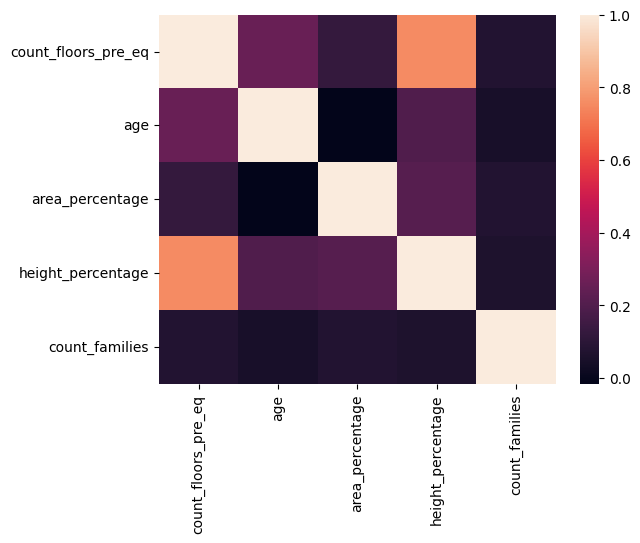

In [45]:
#проверим корреляцию признаков между собой и с таргетом
sns.heatmap(df[num_cols].corr(method='spearman'))

In [46]:
#для корреляции с категориальным таргетом лучше используем корелляцию Кендал-Тау
df[num_cols+[target]].corr(method='kendall')[target] 

count_floors_pre_eq    0.131025
age                    0.143491
area_percentage       -0.083437
height_percentage      0.068860
count_families         0.058471
damage_grade           1.000000
Name: damage_grade, dtype: float64

значимых корреляций между числовыми признаками и таргетом нет,
проверим категориальные признаки, для этого используем критерий Крамера

In [47]:
from scipy.stats import chi2_contingency
# реализация расчета коэффициента Крамера.
# https://en.wikipedia.org/wiki/Cramér%27s_V
# формула реализована с учетом Bias Correction 
def cramer_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    if confusion_matrix.shape[0] == 0:
        return 0
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r,k = confusion_matrix.shape
    rcorr= r  - (r-1)**2 / (n - 1)
    kcorr= k  - (k-1)**2 / (n - 1)
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    if kcorr <= 1 or rcorr <= 1:
        return 0
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [48]:
import itertools

<AxesSubplot:>

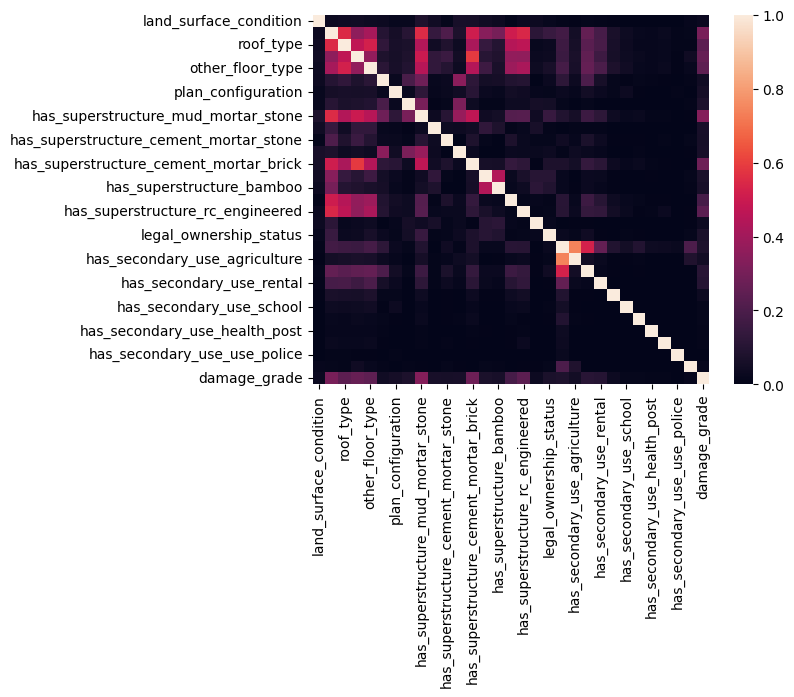

In [49]:
df_corr_cat = pd.DataFrame(columns=cat_cols+[target], index=cat_cols+[target], dtype=np.float)
for comb in list(itertools.combinations(cat_cols+[target], 2)):
    corr = cramer_v(df[comb[0]], df[comb[1]])
    df_corr_cat.loc[comb[0], comb[1]] = corr
    df_corr_cat.loc[comb[1], comb[0]] = corr
np.fill_diagonal(df_corr_cat.values, 1.0)
sns.heatmap(df_corr_cat)

### Построение моделей

In [50]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from category_encoders.hashing import HashingEncoder

In [51]:
#   Для числовых - применяем SimpleImputer, а затем StandardScaler и затем селектим лучшие переменные через Аннову
numerical_pipeline_transformer = Pipeline(steps=[
                                        ("imputer", SimpleImputer(strategy='mean')),
                                        ("scaler", StandardScaler()),
                                        ("fs", SelectKBest(score_func=f_classif, k="all"))])


#   Для категориальных - применяем SimpleImputer,  OrdinalEncoder, селектим лучшие переменные через критерий хи2
categorical_pipeline_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ("fs", SelectKBest(score_func=chi2, k="all")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

def to_categorical(data):
    return data.astype('object')

#   Для категориальных c большим кол-вом значений - применяем SimpleImputer,  OrdinalEncoder, селектим лучшие переменные через критерий хи2
hashing_pipeline_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("fs", SelectKBest(score_func=chi2, k="all")),
    ("str", FunctionTransformer(to_categorical)),
    ("hashing", HashingEncoder())
])


In [52]:

# Собираем воедино трансформеры 
data_pipeline_transformer = ColumnTransformer(transformers=[
    ("numerical", numerical_pipeline_transformer, num_cols), 
    ("categorical", categorical_pipeline_transformer, cat_cols),
    ("hashing", hashing_pipeline_transformer, hash_cols),
], remainder='drop')


In [53]:
# Создание конвейера препроцессора, который сначала преобразует данные
preprocessor = Pipeline(steps=[("data_transformer", data_pipeline_transformer)])

In [54]:
#проверим работу трансформера
preprocessor.fit_transform(df_train, df_train[target])

array([[ 1.19480658, -0.08862788,  0.45066908, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17764597, -0.22523503, -1.36796654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17764597, -0.08862788, -0.23131928, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.17764597,  0.18458641,  1.35998689, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.19480658,  0.11628284, -0.45864873, ...,  0.        ,
         0.        ,  0.        ],
       [-1.55009852, -0.2935386 , -1.36796654, ...,  1.        ,
         0.        ,  0.        ]])

In [55]:
#прицепим первую простую модель
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')

classifier_pipeline_1 = Pipeline(steps=[
    ('preproc', preprocessor),
    ('model', model)
])

classifier_pipeline_1

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['count_floors_pre_eq',
                                                                    'age',
                                                                    'area_perce

In [56]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, f1_score, classification_report

In [57]:
f1 = make_scorer(f1_score, average="micro")
scores = cross_val_score(classifier_pipeline_1, df_train, df_train[target], scoring=f1, cv=3, n_jobs=1)

In [58]:
#посмотрим на скоринги
scores

array([0.60875759, 0.60817636, 0.60834904])

In [59]:
#прицепим вторую простую модель
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=50, max_depth=8, class_weight="balanced", random_state=143, n_jobs=-1)

classifier_pipeline2 = Pipeline(steps=[
    ('preproc', preprocessor),
    ('model', model2)
])

classifier_pipeline2

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['count_floors_pre_eq',
                                                                    'age',
                                                                    'area_perce

In [60]:
scores = cross_val_score(classifier_pipeline2, df_train, df_train[target], scoring=f1, cv=3, n_jobs=1)

In [61]:
#посмотрим на скоринги
scores

array([0.51500849, 0.51832559, 0.5158793 ])

In [62]:
#попробуем xgboost
from xgboost import XGBClassifier

model3 = XGBClassifier(n_estimators=50, max_depth=8, learning_rate=0.1,random_state=143, n_jobs=-1)

classifier_pipeline3 = Pipeline(steps=[
    ('preproc', preprocessor),
    ('model', model3)
])

classifier_pipeline3

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['count_floors_pre_eq',
                                                                    'age',
                                                                    'area_perce

In [63]:
scores = cross_val_score(classifier_pipeline3, df_train, df_train[target], scoring=f1, cv=3, n_jobs=1)

[12:12:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
#посмотрим на скоринги
scores

array([0.63805508, 0.64029471, 0.63748867])

In [65]:
classifier_pipeline3.fit(df_train, df_train[target])

[12:13:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preproc',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['count_floors_pre_eq',
                                                                    'age',
                                                                    'area_perce

In [66]:
#check the score on test
f1_score(df_test[target], classifier_pipeline3.predict(df_test), average="micro")

0.6394927188657163

## Вывод

Было проведено сравнение двух подходов AutoML (AutoGluon и LightAutoMl) и 3 моделей из коробки, без особого тюнинга параметров и данных.
Сравнение проводилось по метрике F1-score (как было указазано на странице соревнования)

Лучшая коробочная модель показала метрику **0.6395** 

AutoGluon даже за несколько минут тренировки сразу показал метрику на порядок выше **0.7486**

LightAutoMl за отведенное время не справился, метрика всего **0.1105**

Т.о. AutoGluon существенно ускорил время построения модели с высшим качетсвом.